## Universidad del Valle de Guatemala - 22/07/2022
## Laboratorio 1
### Integrantes
Jose Abrahama Gutierrez Corado - 19111

Walter Danilo Saldaña - 19897

Javier Alejandro Cotto Argueta -19324


### Importar Modulos

In [1]:
import pandas as pd
from apyori import apriori   # pip3 install apyori
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Datos y Resumen Estadistico

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DESCRIPCIÓN DE VARIABLES


MSSubClass - CATEGÓRICA

MSZoning - CATEGÓRICA

LotFrontage - CUANTITATIVA DISCRETA

LotArea - CUANTITATIVA DISCRETA

Street - CATEGÓRICA

Alley - CATEGÓRICA

LotShape - CUALITATIVA

LandContour - CUALITATIVA

Utilities - CATEGÓRICA

LotConfig - CUALITATIVA

LandSlope - CUALITATIVA

Neighborhood - CATEGÓRICA

Condition1 - CATEGÓRICA

Condition2 -CATEGÓRICA

BldgType - CATEGÓRICA

HouseStyle - CATEGÓRICA

OverallQual - CUALITATIVA

OverallCond - CUALITATIVA

YearBuilt - CUANTITATIVA DISCRETA

YearRemodAdd - CUANTITATIVA DISCRETA

RoofStyle - CATEGÓRICA

RoofMatl - CUALITATIVA

Exterior1st - CATEGÓRICA

Exterior2nd - CATEGÓRICA

MasVnrType - CUALITATIVA

MasVnrArea - CUANTITATIVA DISCRETA

ExterQual - CUALITATIVA

ExterCond - CUALITATIVA

Foundation - CUALITATIVA

BsmtQual - CUALITATIVA

BsmtCond - CUALITATIVA

BsmtExposure - CUALITATIVA

BsmtFinType1 - CUALITATIVA

BsmtFinSF1 - CATEGÓRICA

BsmtFinType2 - CUALITATIVA

BsmtFinSF2 - CATEGÓRICA

BsmtUnfSF - CUANTITATIVA DISCRETA

TotalBsmtSF - CUANTITATIVA DISCRETA

Heating - CATEGÓRICA

HeatingQC - CUALITATIVA

CentralAir - CATEGÓRICA

Electrical - CATEGÓRICA

1stFlrSF - CUANTITATIVA DISCRETA

2ndFlrSF - CUANTITATIVA DISCRETA

LowQualFinSF - CUANTITATIVA DISCRETA

GrLivArea - CUANTITATIVA DISCRETA

BsmtFullBath - CUANTITATIVA DISCRETA

BsmtHalfBath - CUANTITATIVA DISCRETA

FullBath - CUANTITATIVA DISCRETA

HalfBath - CUANTITATIVA DISCRETA

BedroomAbvGr - CUANTITATIVA DISCRETA

KitchenAbvGr - CUANTITATIVA DISCRETA

KitchenQual - CUALITATIVA

TotRmsAbvGrd - CUANTITATIVA DISCRETA

Functional - CUALITATIVA

Fireplaces - CUANTITATIVA DISCRETA

FireplaceQu - CUALITATIVA

GarageType - CUALITATIVA

GarageYrBlt - CUANTITATIVA DISCRETA

GarageFinish - CUANTITATIVA DISCRETA

GarageCars - CUANTITATIVA DISCRETA

GarageArea - CUANTITATIVA DISCRETA

GarageQual - CUALITATIVA

GarageCond - CATEGÓRICA

PavedDrive - CATEGÓRICA

WoodDeckSF - CUANTITATIVA DISCRETA

OpenPorchSF - CUANTITATIVA DISCRETA

EnclosedPorch - CUANTITATIVA DISCRETA

3SsnPorch - CUANTITATIVA DISCRETA

ScreenPorch - CUANTITATIVA DISCRETA

PoolArea - CUANTITATTIVA DISCRETA

PoolQC - CUANTITATIVA DISCRETA

Fence - CUALITATIVA

MiscFeature - CUALITATIVA

MiscVal - CUANTITATIVA DISCRETA

MoSold - CATEGÓRICA

YrSold - CATEGÓRICA

SaleType - CATEGÓRCA

SaleCondition - CATEGÓRICA

SalePrice - CUANTITATIVA DISCRETA

### Limpieza de datos y gráficos correspondientes

In [8]:
dfDrop = df.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

dfDrop.dropna(subset = ["LotFrontage"], inplace = True)
dfDrop.dropna(subset = ["MasVnrArea"], inplace = True)
dfDrop.dropna(subset = ["GarageYrBlt"], inplace = True)

In [9]:
dfDrop

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


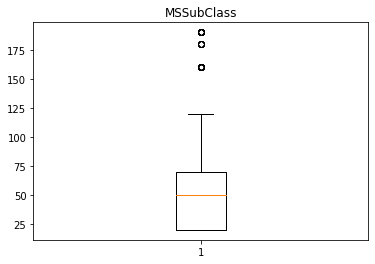

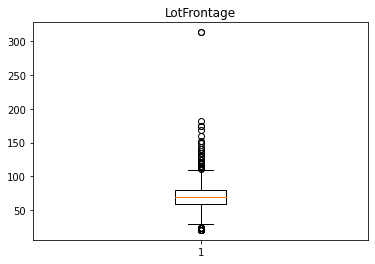

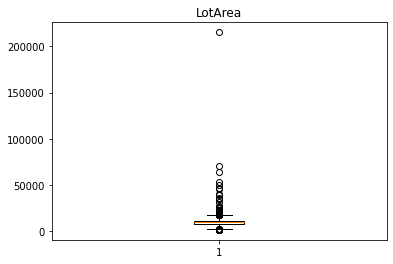

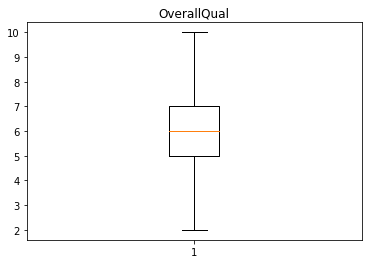

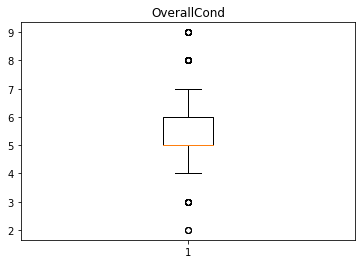

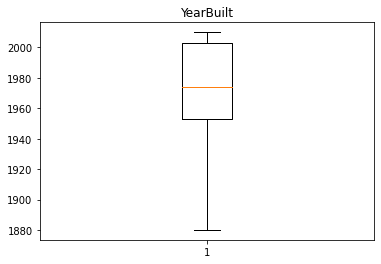

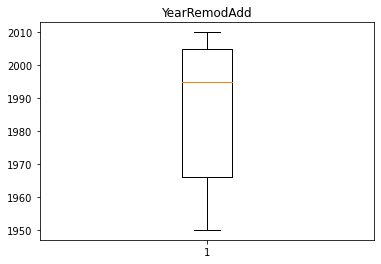

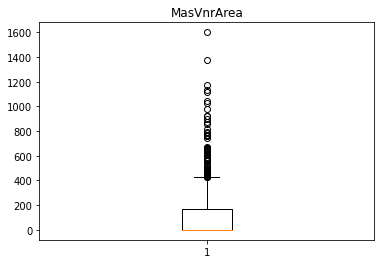

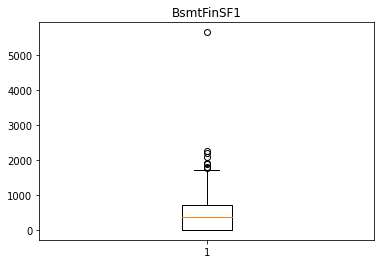

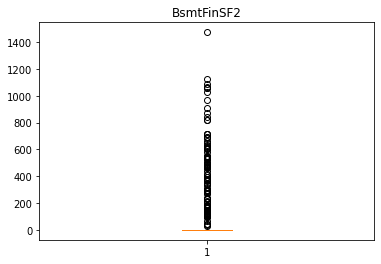

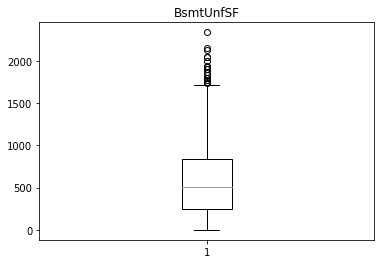

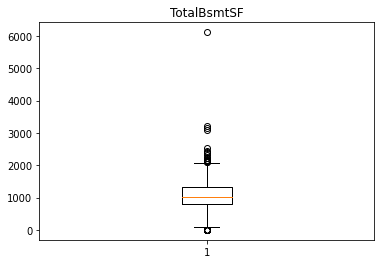

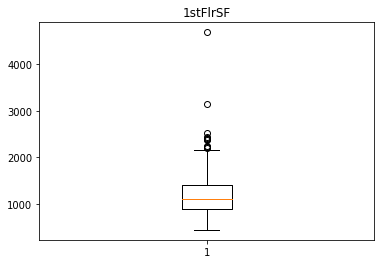

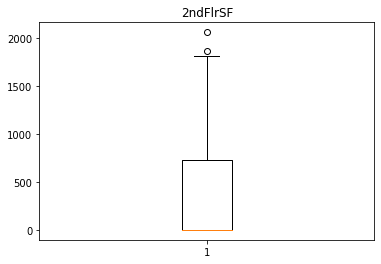

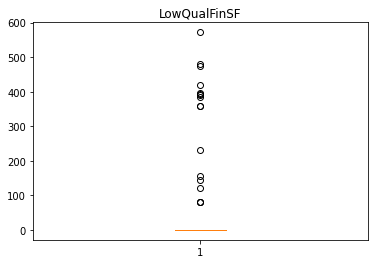

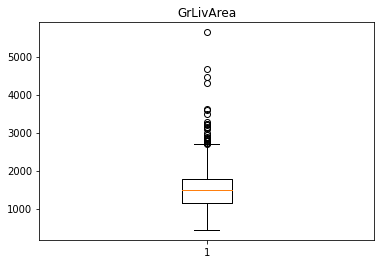

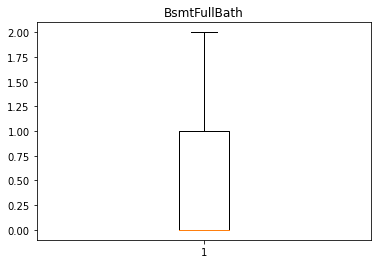

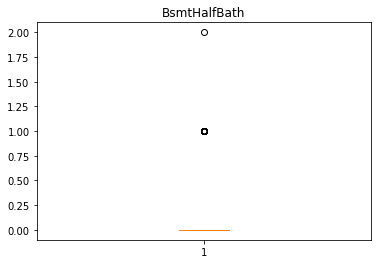

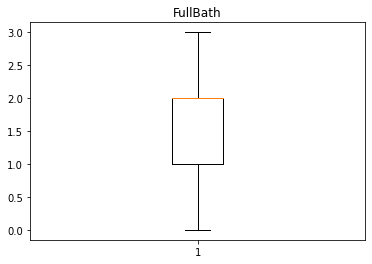

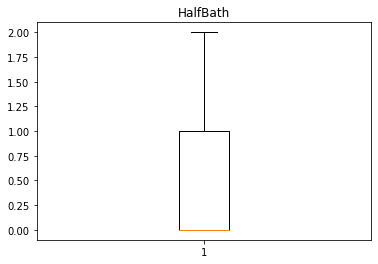

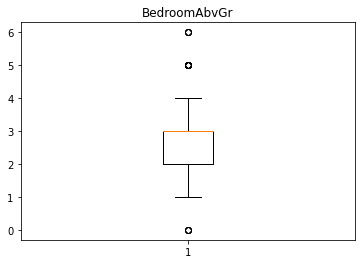

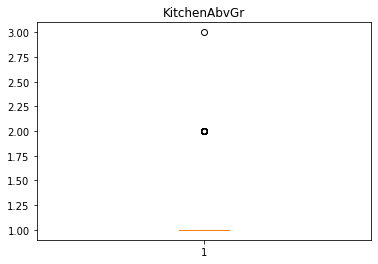

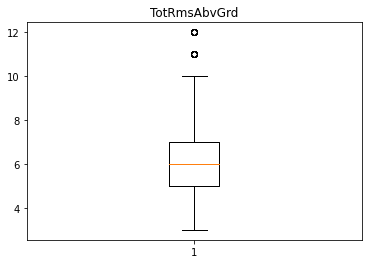

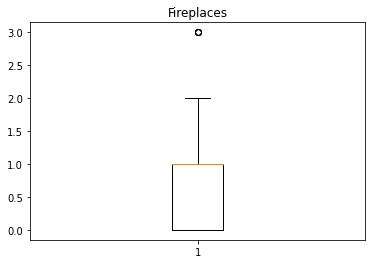

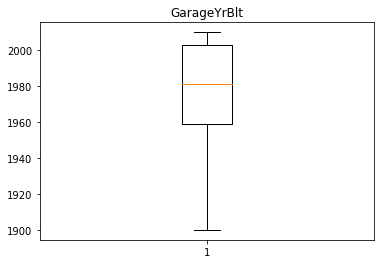

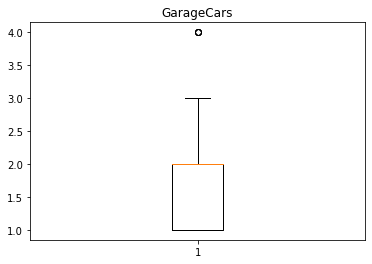

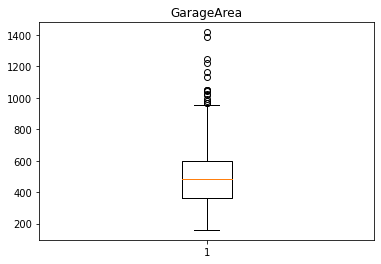

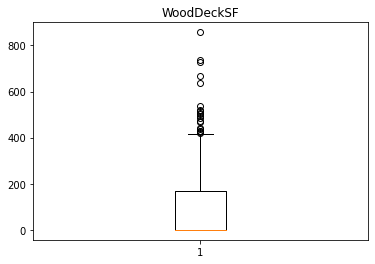

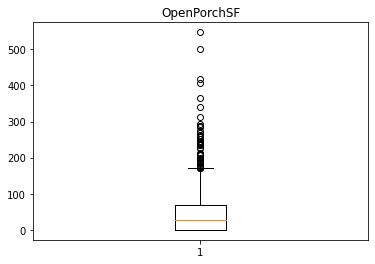

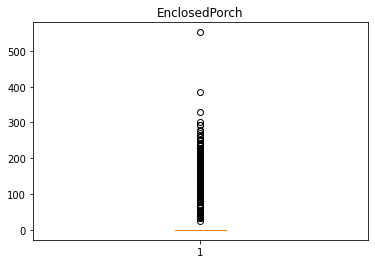

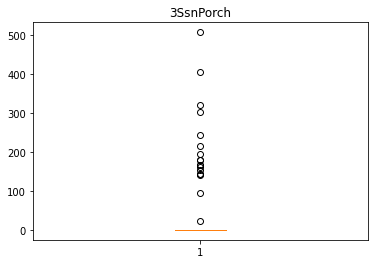

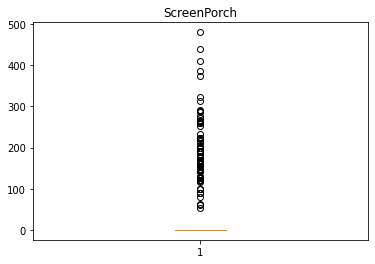

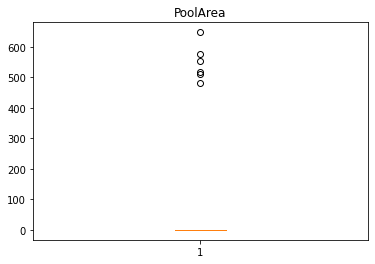

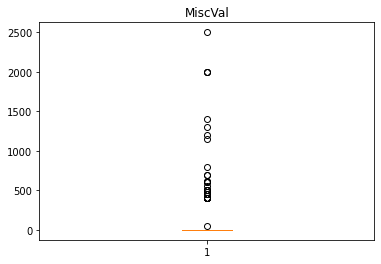

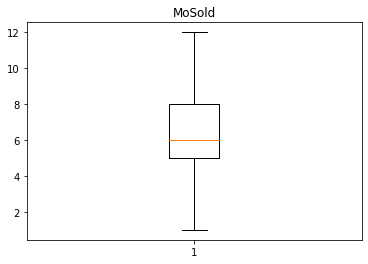

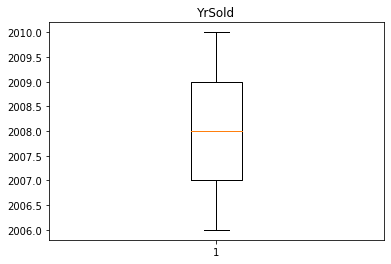

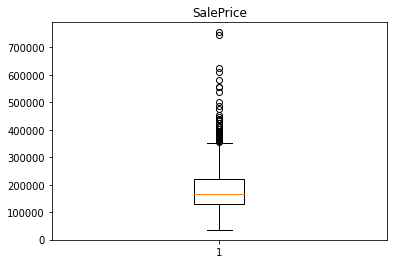

In [10]:
columns = []
for col in dfDrop.columns:
    columns.append(col)
    
for columna in columns:
    plt.boxplot(dfDrop[columna])
    plt.title(columna)
    plt.show()

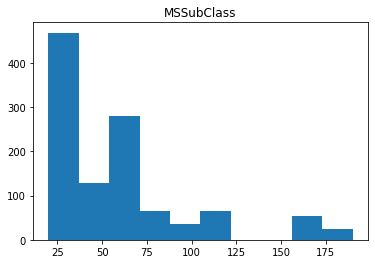

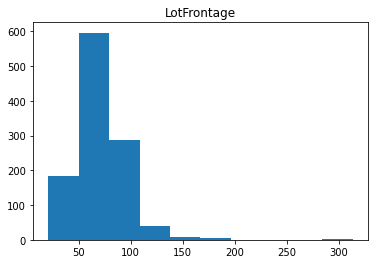

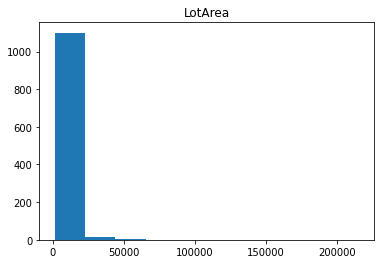

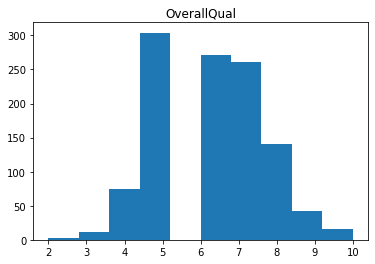

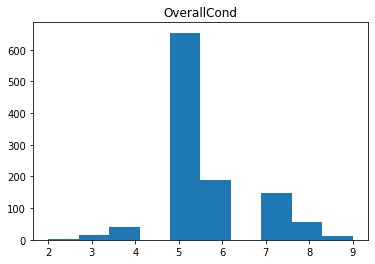

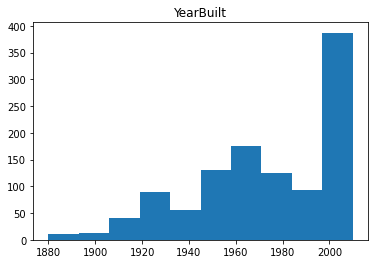

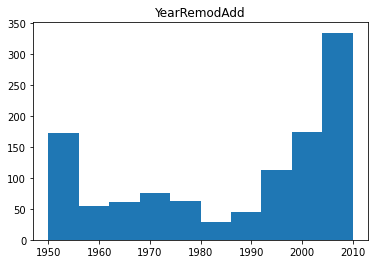

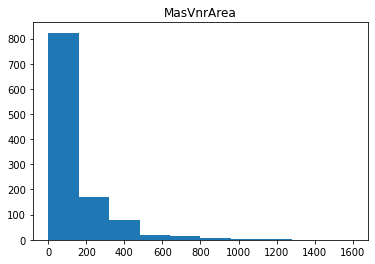

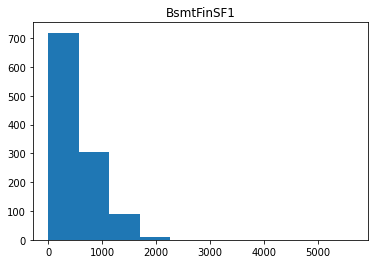

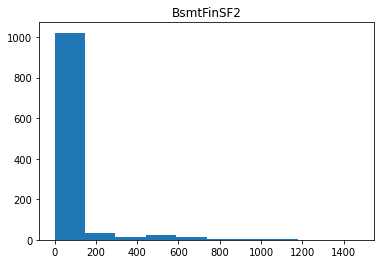

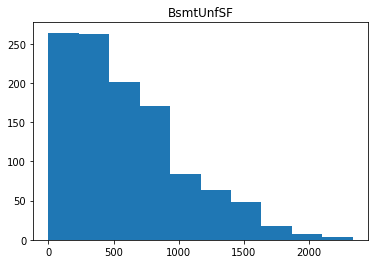

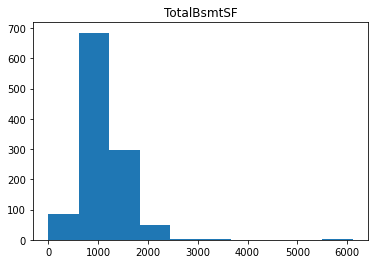

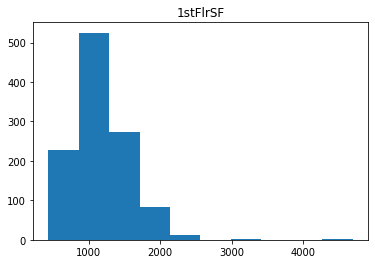

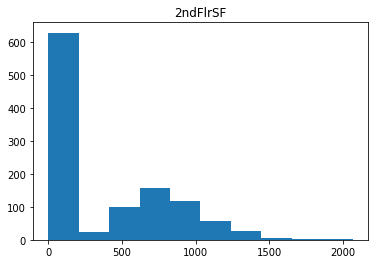

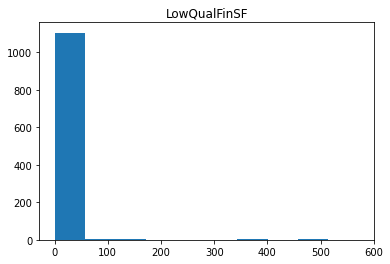

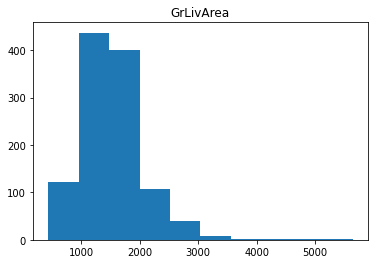

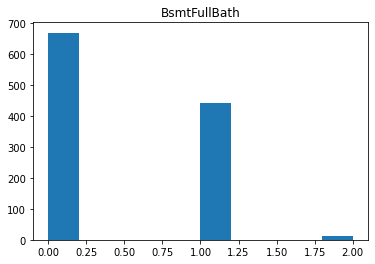

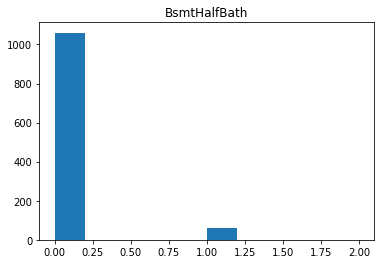

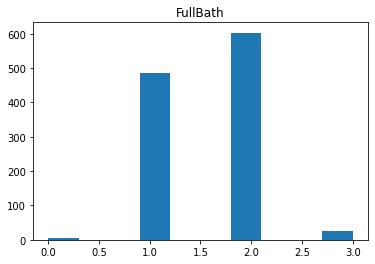

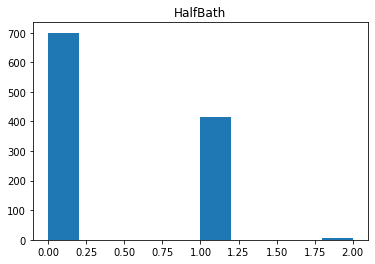

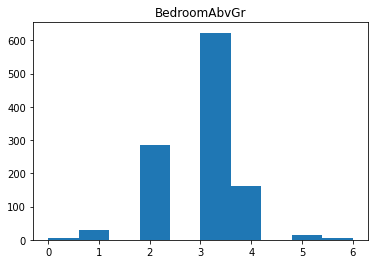

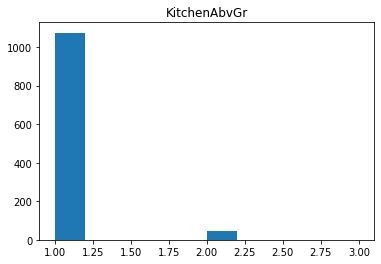

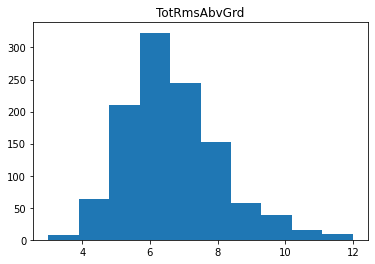

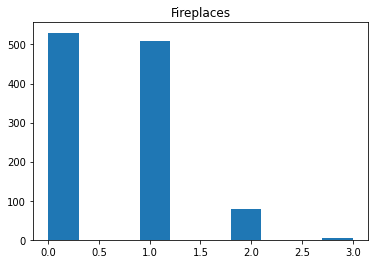

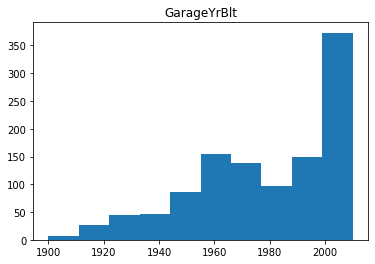

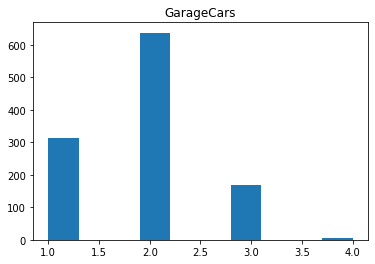

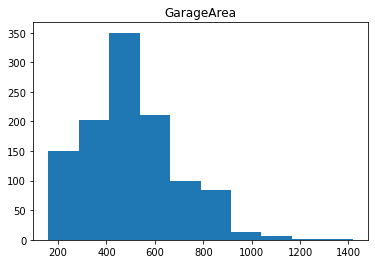

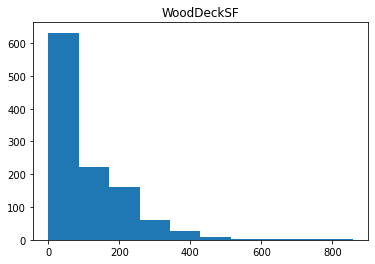

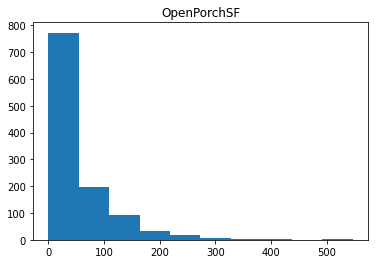

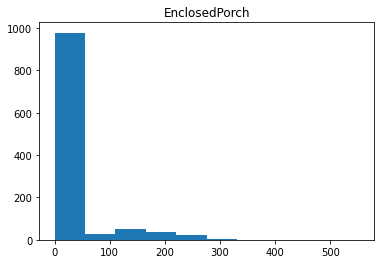

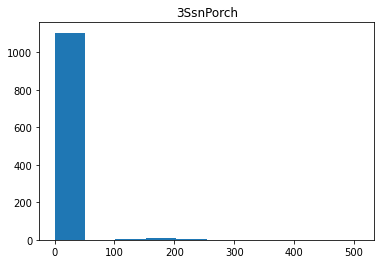

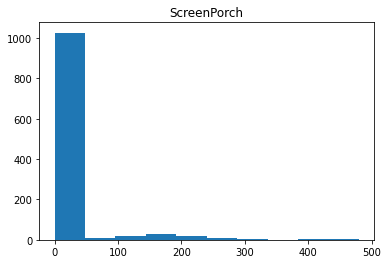

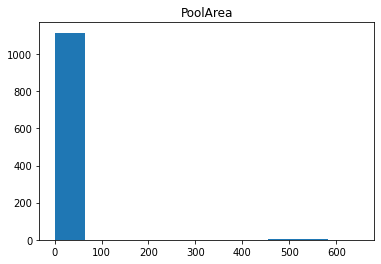

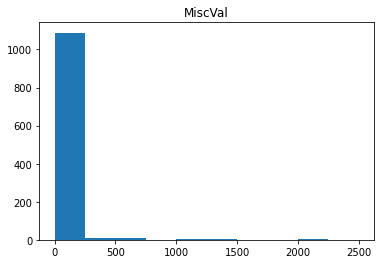

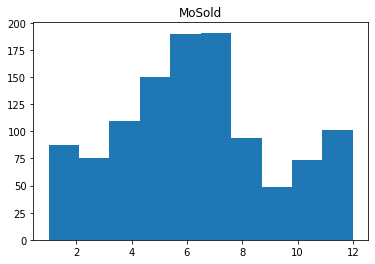

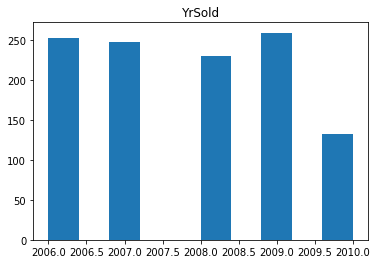

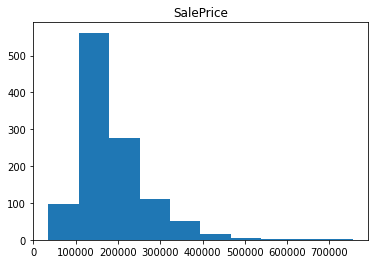

In [12]:
columns = []
for col in dfDrop.columns:
    columns.append(col)
    
for columna in columns:
    plt.hist(dfDrop[columna])
    plt.title(columna)
    plt.show()